In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from lib.plots import load_data, climatology, single_column_initial_value, training as tp, get_error_tables

import seaborn as sns


width = 5.5
dpi = 100

sns.set_context("paper")
sns.set_style("white", {
    'figure.figsize' : (5.51, 5.51/1.61),
    'figure.dpi': 100,
    'image.cmap': 'viridis',
    'xtick.major.size': 3.5,
    'xtick.major.size': 3.5,
    'xtick.minor.size' : 1.75,
    'xtick.minor.visible' : True,
    'ytick.major.size': 3.5,
})


I put the styling commands in the following few boxes

In [2]:
# plt.style.use(["default", "paper.style"])
width = 5.5
dpi = 100
# this magic needs to happen after I reset the rcParams
plt.rc("figure", dpi=150)

Here, I load the data and select the testing region.

In [3]:
ds = load_data(best_nn="model.VaryT-20/3")
ds_test = ds.isel(x=slice(0,64))

# Figure 2: Training Process

In [4]:
nhid, data = tp.get_plotting_data("../../data/output/")

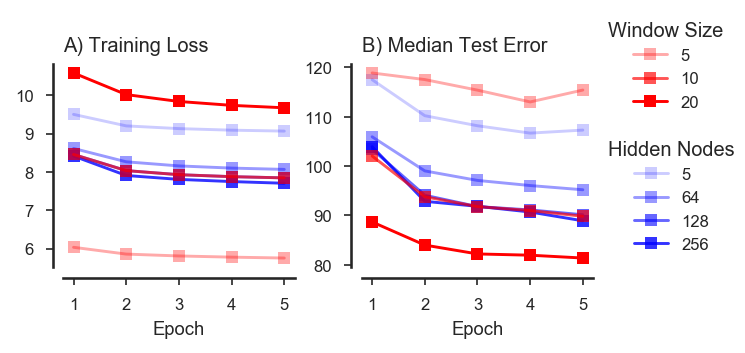

In [5]:
data = tp.get_plotting_data("../../data/output/")
axs = tp.plot_epochs_vs_loss(data)
plt.savefig("/Users/noah/Dropbox/fig2.pdf")

# Table 1: Hyper Parameters

In [6]:
df = get_error_tables("../../data/output/test_error.nc")
df

$n$ $T$ Apparent Source $R^2$                64 Step Error                
                           $q_T$        $s_L$           $q_T$           $s_L$
0  128   2           0.65 (0.02)  0.75 (0.01)        $\infty$        $\infty$
1  128   5           0.64 (0.02)  0.76 (0.01)  169.40 (45.37)  294.95 (53.52)
2  128  10           0.62 (0.01)  0.75 (0.01)  165.60 (16.68)  275.16 (13.08)
3  128  20           0.57 (0.02)  0.74 (0.02)    85.92 (3.36)   178.91 (6.32)
4  128  40           0.48 (0.02)  0.70 (0.02)    84.37 (2.75)   180.02 (3.37)
5    5  10           0.58 (0.02)  0.73 (0.02)  231.35 (61.31)  449.07 (84.05)
6   64  10           0.62 (0.02)  0.75 (0.02)  126.48 (16.23)  255.74 (19.82)
7  128  10           0.62 (0.01)  0.75 (0.01)  165.60 (16.68)  275.16 (13.08)
8  256  10           0.61 (0.01)  0.75 (0.01)   123.09 (7.34)   221.92 (7.71)

Copy paste this into the latex file.

In [7]:
print(df.to_latex(index=False, escape=False))

\begin{tabular}{rrllll}
\toprule
 $n$ & $T$ & \multicolumn{2}{l}{Apparent Source $R^2$} & \multicolumn{2}{l}{64 Step Error} \\
     &                 $q_T$ &        $s_L$ &           $q_T$ &           $s_L$ \\
\midrule
 128 &   2 &           0.65 (0.02) &  0.75 (0.01) &        $\infty$ &        $\infty$ \\
 128 &   5 &           0.64 (0.02) &  0.76 (0.01) &  169.40 (45.37) &  294.95 (53.52) \\
 128 &  10 &           0.62 (0.01) &  0.75 (0.01) &  165.60 (16.68) &  275.16 (13.08) \\
 128 &  20 &           0.57 (0.02) &  0.74 (0.02) &    85.92 (3.36) &   178.91 (6.32) \\
 128 &  40 &           0.48 (0.02) &  0.70 (0.02) &    84.37 (2.75) &   180.02 (3.37) \\
   5 &  10 &           0.58 (0.02) &  0.73 (0.02) &  231.35 (61.31) &  449.07 (84.05) \\
  64 &  10 &           0.62 (0.02) &  0.75 (0.02) &  126.48 (16.23) &  255.74 (19.82) \\
 128 &  10 &           0.62 (0.01) &  0.75 (0.01) &  165.60 (16.68) &  275.16 (13.08) \\
 256 &  10 &           0.61 (0.01) &  0.75 (0.01) &   123.09 (7.34) &

# Figure 6: Forced Single Column

In [8]:

def plot_t_vs_p(loc, axs, cax=None,
    models = ('Truth', 'Neural Network', 'CAM'),
    levels = np.arange(11)*2, text_kwargs=dict(),
             **kwargs,):
    

    for model, ax in zip(models, axs):
        val = loc.sel(model=model)
        im = ax.contourf(val.time, val.p, val.T, levels=levels, **kwargs)
        ax.contour(val.time, val.p, val.T, levels=levels, linewidths=.1, **kwargs)
    
        # add labels
        plt.text(.04, .8, model, transform=ax.transAxes, fontsize=10, **text_kwargs)

#     axs[0].invert_yaxis()


#     plt.colorbar(im, orientation='vertical', pad=.01, **cbar_kwargs, )
    
    return im

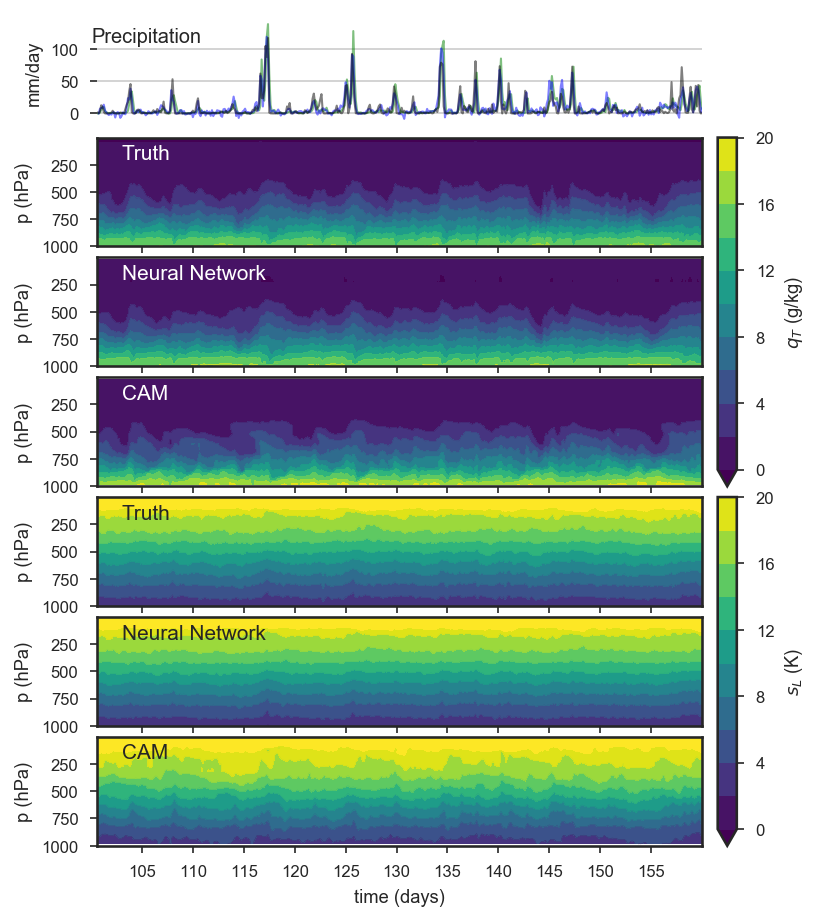

In [9]:
loc = ds.isel(x=10, y=8)

from matplotlib import gridspec


fig = plt.figure(figsize=(width, 6))
gs = gridspec.GridSpec(7, 2, width_ratios=(.95, .03),
                      height_ratios=[1]*7,
                       wspace=.05,
                      hspace=.1,
                      bottom=.07, top=.99)

# precip
axp = fig.add_subplot(gs[0, 0])
colors = {'Truth': 'k', 'CAM': 'g', 'Neural Network': 'b'}
for model, value in loc.groupby('model'):
    axp.plot(value.time, value.prec.squeeze(), label='model',
            linewidth=1.0, c=colors[model], alpha=.5)
    
for spine in set(axp.spines):
    axp.spines[spine].set_color('none')
axp.xaxis.set_visible(False)
axp.set_yticks([0, 50, 100])
axp.set_ylabel("mm/day")
axp.grid(axis='y')
axp.text(100, 110, 'Precipitation')
axp.set_xlim([ds.time.min(), ds.time.max()])

# humidity
axsq = [fig.add_subplot(gs[i, 0], sharex=axp) for i in range(1,4)]
imq = plot_t_vs_p(loc.qt, axsq, extend='min', text_kwargs={'color': 'white'})
cb = fig.colorbar(imq, cax=fig.add_subplot(gs[1:4, 1]))
cb.set_label(r"$q_T$ (g/kg)")

# temperature
axst = [fig.add_subplot(gs[i, 0], sharex=axp) for i in range(4,7)]
plot_t_vs_p(loc.sl, axst, extend='max', levels=np.arange(11)*5 + 290)
cb = fig.colorbar(imq, cax=fig.add_subplot(gs[4:, 1]))
cb.set_label(r"$s_L$ (K)")


# fix axes
for ax in axsq + axst:
    ax.set_ylabel('p (hPa)')
    ax.set_yticks([1000, 750, 500, 250])
    ax.set_ylim([1000, 0])
    
#     ax.set_xticklabels([1])
    
axp.set_xlim([100.625, 160])
axp.set_xticks(np.r_[105:160:5])

axst[-1].set_xlabel("time (days)")

plt.savefig("/Users/noah/Dropbox/fig6.pdf", bbox='tight')

# Figure 7:  Equilibrium

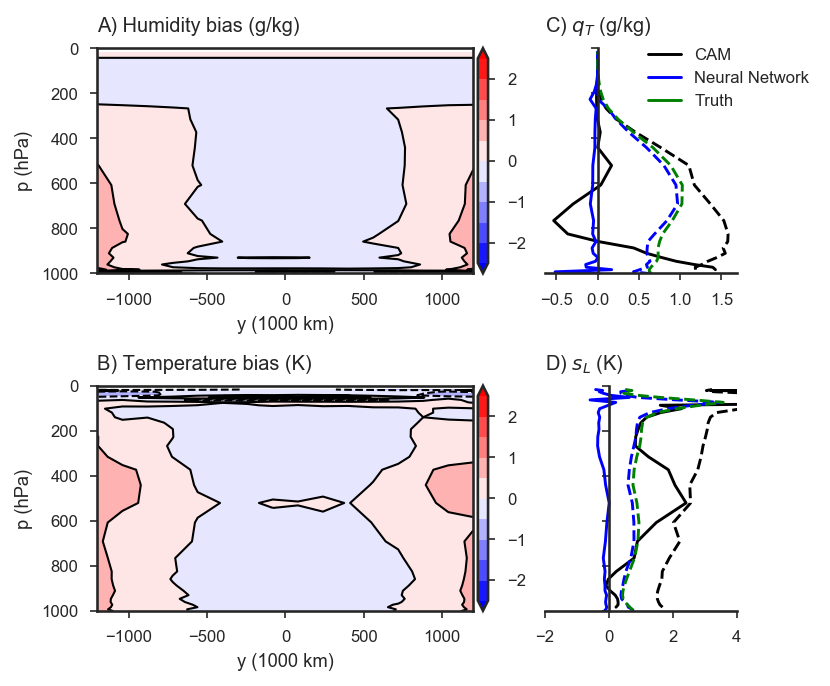

In [10]:
with plt.rc_context({'axes.titlepad': 8.0}):
    climatology.plot(ds_test, width=width)
    plt.savefig("/Users/noah/Dropbox/fig7.pdf")

# Transient Error growth (qt)

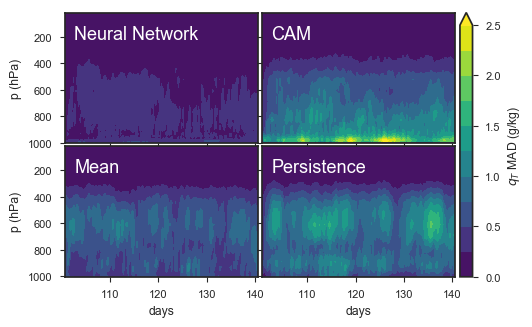

In [11]:
import lib.plots.transient_error as te
from toolz import valmap
from toolz.curried import get

mad = te.compute_errors(te.mean_absolute_dev, ds_test.isel(y=8), dims=['x'])
mad_qt = valmap(get('qt'), mad)
_, cb = te.plot_mses(mad_qt, levels=np.arange(11)*.25,
                  extend='max',
                  label='$q_T$ MAD (g/kg)')

plt.savefig("/Users/noah/Dropbox/errqt.png")

# Transient Error growth (sl)

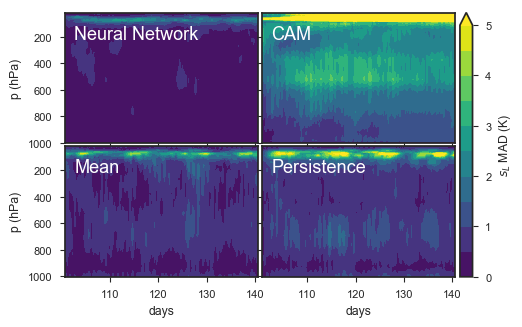

In [12]:
mad_sl = valmap(get('sl'), mad)
_, cb = te.plot_mses(mad_sl, levels=np.arange(11)*.5,
                  extend='max',
                  label='$s_L$ MAD (K)')
plt.savefig("/Users/noah/Dropbox/errqSl.png")

# Column Averaged Errors

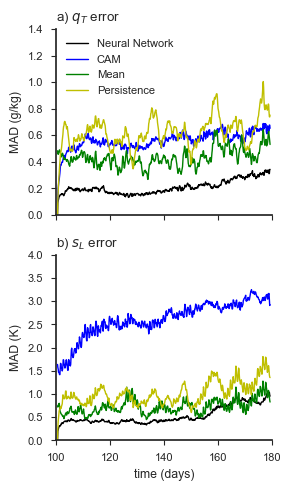

In [13]:
axs = te.plot_column_error(ds_test.isel(y=8));
plt.savefig("/Users/noah/Dropbox/errCol.pdf")

There must be some error with how I am computing $s_L$. Maybe I should just compare temperature?